# Clasificador de vinos
## Ejemplo de parcial

El conjunto de datos contiene los ejemplos de 178 vinos. Cada uno identificado por 13 propiedades químicas:
* Alcohol
* Malic_acid
* Ash
* Alcalinity
* Magnesium
* Phenols
* Flavanoids
* Nonflavanoid
* Proanthocyanins
* Color
* Hue
* OD280/OD315
* Proline

A cada vino le fue asignada una clase, que corresponde al tipo de vino $[1, 2, 3]$

Resuelva:
* Cargue el conjunto de datos como un DataFrame de Pandas
* Cargue la clase en un arreglo aparte. Eliminela del DataFrame de Pandas
* Genere un histograma para cada propiedad del conjunto de datos
* Use `scatter_matrix` y visualize todas las posibles combinaciones de características
    * ¿Encuentra algún par de características en el que se observan las clases bien separadas?
* Clasificación usando solo dos características y el esquema Multinomial:
    * Entrene un modelo LogisticRegression para categorizar el tipo de vino usando `Proline` contra `Flavonoids`.
    * Entrene otro modelo LogisticRegression para categorizar el tipo de vino usando `Alcalinity` contra `Malic Acid`.
    * Imprima la región de decisión de cada clasificador.
    * Genere la matriz de confusión de cada clasificador.
    * Reporte el accuracy, el error de clasificación, la precisión macro, el recall macro y el F1 score macro.
    * ¿Cual modelo se desempeña mejor? ¿Por qué?
* Clasificación usando todas las características:
    * Entrene un modelo LogisticRegression usando el esquema "*One vs All*".
    * Entrene un modelo LogisticRegression usando el esquema multinomial.
    * Genere la matriz de confusión de cada clasificador.
    * Reporte el accuracy, el error de clasificación, la precisión por clase, el recall por clase y el F1 score por clase.
    * ¿Cual modelo se desempeña mejor? ¿Por qué? ¿Cual clase es más sencilla para el clasificador?

In [1]:
with open("/content/wine.data.txt") as f:  
    data = f.readlines()

In [2]:
data[:15]

['Class,Alcohol, Malic_acid, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoid, Proanthocyanins,Color, Hue, OD280/OD315, Proline    \n',
 '1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065\n',
 '1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050\n',
 '1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185\n',
 '1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480\n',
 '1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735\n',
 '1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450\n',
 '1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290\n',
 '1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295\n',
 '1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045\n',
 '1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045\n',
 '1,14.1,2.16,2.3,18,105,2.95,3.32,.22,2.38,5.75,1.25,3.17,1510\n',
 '1,14.12,1.48,2.32,16.8,95,2.2,2.43,.26,1.57,5,1.17,2.82,1280\n',
 '1,13.75,1.73,2.41,1

In [3]:
!rm -rf data/
!rm -rf data.z*
!drm -rf mlutils.p*
!mkdir -p data/
!wget https://github.com/marcoteran/machinelearning/raw/master/notebooks/01_machinelearnig/data/nba.csv
!ls

/bin/bash: drm: command not found
--2021-03-24 00:17:49--  https://github.com/marcoteran/machinelearning/raw/master/notebooks/01_machinelearnig/data/nba.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcoteran/machinelearning/master/notebooks/01_machinelearnig/data/nba.csv [following]
--2021-03-24 00:17:49--  https://raw.githubusercontent.com/marcoteran/machinelearning/master/notebooks/01_machinelearnig/data/nba.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22071 (22K) [text/plain]
Saving to: ‘nba.csv’

nba.csv             100%[===================>]  21.55K  --.-KB/s    in 0.001s  



In [4]:
import pandas as pd

In [9]:
winedata_df=pd.read_csv("/content/wine.data.txt")

In [10]:
winedata_df

,Class,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
wine_labels=winedata_df['Class']

In [13]:
wine_labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [14]:
winedata_df.drop('Class',axis=1,inplace=True)

In [15]:
winedata_df

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [32]:
import matplotlib as plt
import numpy as np

In [33]:
wineindex=np.array(winedata_df.keys())

In [40]:
labelsnumber=len(wineindex)
labelsnumber

13

In [36]:
wineindex[0]

'Alcohol'

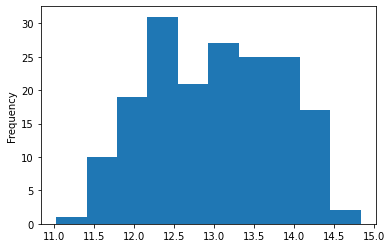

In [37]:
winedata_df[wineindex[0]].plot.hist()

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

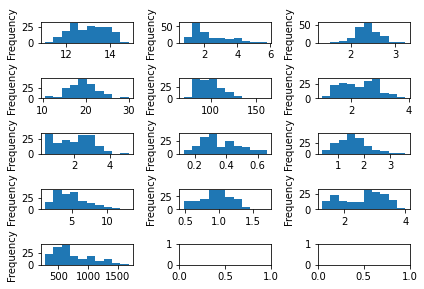

In [55]:
fig = plt.figure()

gs = gridspec.GridSpec(5, 3)
index_car=0
for g in gs:
    ax = fig.add_subplot(g)
    if index_car<13:
      ax = winedata_df[wineindex[index_car]].plot.hist()
      index_car+=1
fig.tight_layout()